<a href="https://colab.research.google.com/github/hssitja/PhD-Dissertation/blob/Chapter-3/Chapter3_empirical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [174]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as sp
import sympy as smp

import statsmodels.api as sm
# from statsmodels.miscmodels.ordinal_model import OrderedModel

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# from mord import LogisticAT

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
folder = '/content/drive/MyDrive/3 Essay political economy COVID19/Dados/Eleitorais/'

df = pd.read_csv(os.path.join(folder,'df.csv'))

In [177]:
df['NPI_index'].value_counts(dropna=False)

3.0    2867
NaN    1599
2.0     945
1.0      84
0.0       3
Name: NPI_index, dtype: int64

In [178]:
espectro = pd.get_dummies(df[['ELEITO_Espectro','N_ELEITO_espectro','INCUMBENTE_Espectro','N_ELEITO_2016_Espectro']])

In [179]:
df = pd.concat([df,espectro],axis=1)

In [180]:
df.columns

Index(['codigo_ibge', 'codigo_tse',
       'Q1. Cordon Sanitaire (monitoring of entrance and exit of people in the municipality)',
       'Q1. Start date ',
       'Q2. Restrictive measures to avoid circulation/ agglomeration of people',
       'Q2. Start date ',
       'Q3. Measures of social isolation, allowing ONLY essential services',
       'Q3. Start date ', 'Q4. Compulsory use of face covers',
       'Q4. Start date ',
       'Q5. Were any measures implemented to reduce the offer of public transportation?',
       'Q5. What was the percentage of reduction?', 'Q5. Start date ',
       'Q6. Were measures of restriction and social isolation eased?',
       'Q6. Start date ', 'nome_municipio', 'capital', 'FERNANDO HADDAD',
       'JAIR BOLSONARO', 'Haddad_share', 'Bolsonaro_share',
       'ELEITO_NM_URNA_CANDIDATO', 'ELEITO_NM_CANDIDATO',
       'ELEITO_SQ_CANDIDATO', 'ELEITO_ST_REELEICAO', 'ELEITO_SG_PARTIDO',
       'ELEITO_Espectro', 'ELEITO_QT_VOTOS_NOMINAIS', 'ELEITO_PERCENTUAL

Model 1 - Logit, y = 'Q3. Measures of social isolation, allowing ONLY essential services'

In [181]:
model1 = df[['Q3. Measures of social isolation, allowing ONLY essential services', 'Bolsonaro_share',\
             'INCUMBENTE_Espectro_direita','INCUMBENTE_Espectro_esquerda','INCUMBENTE_CANDIDATO_REELEICAO']]

In [182]:
model1['direita_candidato'] = model1['INCUMBENTE_Espectro_direita']*model1['INCUMBENTE_CANDIDATO_REELEICAO']
model1['esquerda_candidato'] = model1['INCUMBENTE_Espectro_esquerda']*model1['INCUMBENTE_CANDIDATO_REELEICAO']

model1 = model1.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 5497
Data columns (total 7 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Q3. Measures of social isolation, allowing ONLY essential services  3910 non-null   float64
 1   Bolsonaro_share                                                     3910 non-null   float64
 2   INCUMBENTE_Espectro_direita                                         3910 non-null   uint8  
 3   INCUMBENTE_Espectro_esquerda                                        3910 non-null   uint8  
 4   INCUMBENTE_CANDIDATO_REELEICAO                                      3910 non-null   int64  
 5   direita_candidato                                                   3910 non-null   int64  
 6   esquerda_candidato                                                  3910 non-null   int64  
dtypes: float64(2), i

In [184]:
y1 = model1['Q3. Measures of social isolation, allowing ONLY essential services']
X1 = model1.drop('Q3. Measures of social isolation, allowing ONLY essential services', axis=1)

In [185]:
logit = sm.Logit(y1,X1)
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.551504
         Iterations 5
                                                  Results: Logit
Model:              Logit                                                              Pseudo R-squared: -0.033   
Dependent Variable: Q3. Measures of social isolation, allowing ONLY essential services AIC:              4324.7605
Date:               2022-10-20 04:36                                                   BIC:              4362.3882
No. Observations:   3910                                                               Log-Likelihood:   -2156.4  
Df Model:           5                                                                  LL-Null:          -2087.4  
Df Residuals:       3904                                                               LLR p-value:      1.0000   
Converged:          1.0000                                                             Scale:            1.0000   
No. Iterations:     5.0000  

Model 2 (probit) and 3 (logit) - Ordinal regression, y = 'NPI_index'

In [186]:
model2 = df[['NPI_index', 'Bolsonaro_share',\
             'INCUMBENTE_Espectro_direita','INCUMBENTE_Espectro_esquerda','INCUMBENTE_CANDIDATO_REELEICAO']]

model2['direita_candidato'] = model2['INCUMBENTE_Espectro_direita']*model2['INCUMBENTE_CANDIDATO_REELEICAO']
model2['esquerda_candidato'] = model2['INCUMBENTE_Espectro_esquerda']*model2['INCUMBENTE_CANDIDATO_REELEICAO']

model2 = model2.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [187]:
model2['NPI_index'].value_counts()

3.0    2867
2.0     945
1.0      84
0.0       3
Name: NPI_index, dtype: int64

In [188]:
model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 5497
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NPI_index                       3899 non-null   float64
 1   Bolsonaro_share                 3899 non-null   float64
 2   INCUMBENTE_Espectro_direita     3899 non-null   uint8  
 3   INCUMBENTE_Espectro_esquerda    3899 non-null   uint8  
 4   INCUMBENTE_CANDIDATO_REELEICAO  3899 non-null   int64  
 5   direita_candidato               3899 non-null   int64  
 6   esquerda_candidato              3899 non-null   int64  
dtypes: float64(2), int64(3), uint8(2)
memory usage: 190.4 KB


In [189]:
model2['NPI_index'] = model2['NPI_index'].astype(pd.CategoricalDtype(categories=[0,1,2,3],ordered=True))

In [190]:
model2['NPI_index'].dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=True)

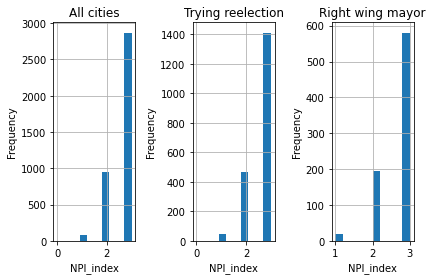

In [191]:
plt.subplot(1, 3, 1)
model2.NPI_index.hist()
plt.title('All cities')
plt.xlabel('NPI_index')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
model2[model2['INCUMBENTE_CANDIDATO_REELEICAO'] == 1].NPI_index.hist()
plt.title('Trying reelection')
plt.xlabel('NPI_index')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
model2[model2['direita_candidato'] == 1].NPI_index.hist()
plt.title('Right wing mayor')
plt.xlabel('NPI_index')
plt.ylabel('Frequency')

plt.tight_layout()


In [192]:
y2 = model2['NPI_index']
X2 = model2.drop('NPI_index', axis=1)

In [193]:
#ordered_probit = OrderedModel(y2, X2, distr='probit')
#result2 = ordered_probit.fit(method='bfgs')
#print(result2.summary())

In [194]:
#ordered_logit = OrderedModel(y2, X2, distr='logit')
#result3 = ordered_logit.fit(method='bfgs', disp=False)
#print(result3.summary())

**Regression Discontinuity Design**

In [195]:
# Using R - %%R to make the whole cell run in R
%load_ext rpy2.ipython

from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
import rpy2.robjects.packages as rpackages
from rpy2.robjects import globalenv
# from rpy2.robjects.vectors import StrVector


pandas2ri.activate()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages('rdrobust')
install.packages('rddensity')
install.packages('huxtable')

In [198]:
%%R
library(tidyverse)
library(broom)
library(rdrobust)
library(rddensity)
library(huxtable)


In [199]:
model3 = df[['MARGIN_VICTORY','INCUMBENTE_ST_REELEICAO','N_ELEITO_2016_ST_REELEICAO',"NPI_index", 'INCUMBENTE_Espectro_direita','INCUMBENTE_Espectro_esquerda',"INCUMBENTE_Espectro_centro"]].dropna(subset=['MARGIN_VICTORY'])

In [200]:
model3 = model3.drop(model3[(model3.INCUMBENTE_ST_REELEICAO != 'S') & (model3.N_ELEITO_2016_ST_REELEICAO != 'S')].index)
model3 = model3.drop(model3[(model3.INCUMBENTE_ST_REELEICAO == 'S') & (model3.N_ELEITO_2016_ST_REELEICAO == 'S')].index)

In [201]:
len(model3)

2399

In [202]:
model3['INCUMBENTE_ST_REELEICAO'].value_counts()

S    1223
N    1176
Name: INCUMBENTE_ST_REELEICAO, dtype: int64

In [203]:
r_df = ro.conversion.py2rpy(model3)
globalenv['r_df'] = r_df

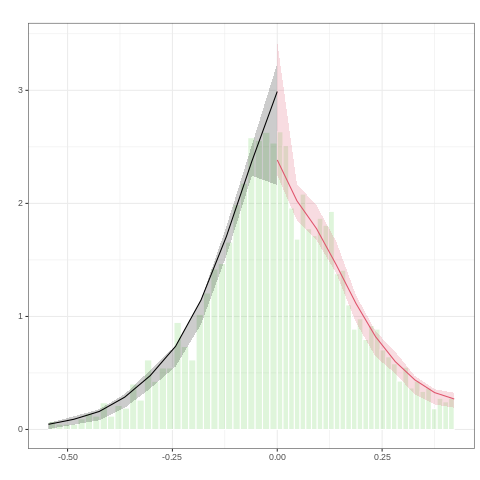

In [206]:
%%R
result_rdd <- rdplotdensity(rdd = rddensity(X = r_df$MARGIN_VICTORY, c = 0), X = r_df$MARGIN_VICTORY)

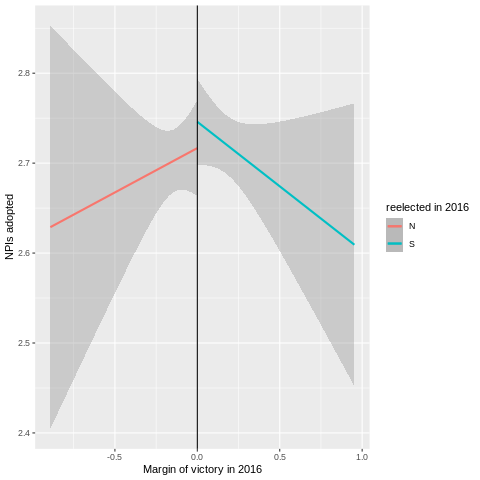

In [208]:
%%R

ggplot(r_df, aes(x = MARGIN_VICTORY, y = NPI_index, color = INCUMBENTE_ST_REELEICAO)) +
  # geom_point(size = 0.5, alpha = 0.5) + 
  # Add a line based on a linear model for the incumbent not reelected
  geom_smooth(data = filter(r_df, MARGIN_VICTORY < 0), method = "glm") +
  # Add a line based on a linear model for the reelected incumbent
  geom_smooth(data = filter(r_df, MARGIN_VICTORY >= 0), method = "glm") +
  geom_vline(xintercept = 0) +
  labs(x = "Margin of victory in 2016", y = "NPIs adopted", color = "reelected in 2016")

1176